In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, plot_importance

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('vlaPhytoBasin.csv')
data.dropna(inplace=True)

In [3]:
X = pd.get_dummies(data)
X = X.iloc[:, :-1]
y = data.iloc[:, -1]
data.head()

,Cyanobacteria,Chlorophyceae,Euglenophyceae,Diatomophyceae,Flagellata,Dinoflagellata,Cryptophytes,picophytoplankton,Basin
0,2.35,3.08,0.92,0.23,0.00,0.0,0.00,3.20,0
1,6.39,2.87,0.49,0.01,0.00,0.0,0.00,2.42,0
2,2.05,7.47,0.00,0.06,0.17,0.0,0.00,2.61,0
3,6.30,5.03,0.00,0.11,0.10,0.0,0.00,2.49,0
4,3.77,5.69,0.00,0.01,0.04,0.0,0.02,1.73,0


In [4]:
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)

Shape of X_train: (108, 8)
Shape of X_test: (47, 8)


In [5]:
n_estimators = [1000, 10]
learning_rate = [0.8, 0.01]
max_depth = [5, 20]
i = 1

KOMBINACJA NUMER 1
n_estimators=1000, learning_rate=0.8, max_depth=5
Accuracy of XGB Classifier on test data: 57.446808510638306
Accuracy of XGB Classifier on train data: 100.0


<Figure size 640x480 with 0 Axes>

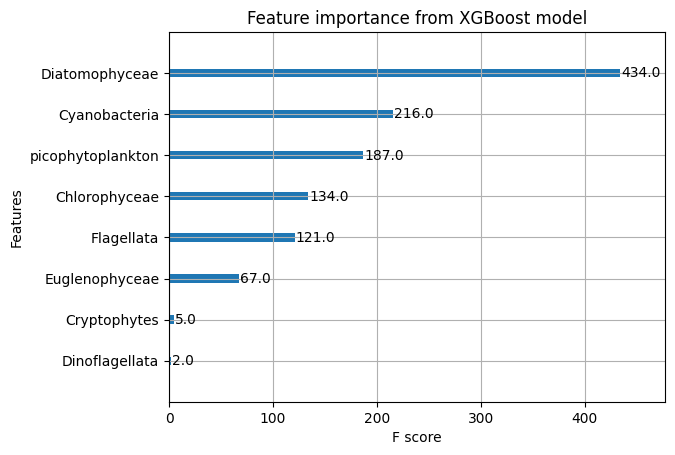

KOMBINACJA NUMER 2
n_estimators=1000, learning_rate=0.8, max_depth=20
Accuracy of XGB Classifier on test data: 55.319148936170215
Accuracy of XGB Classifier on train data: 100.0


<Figure size 640x480 with 0 Axes>

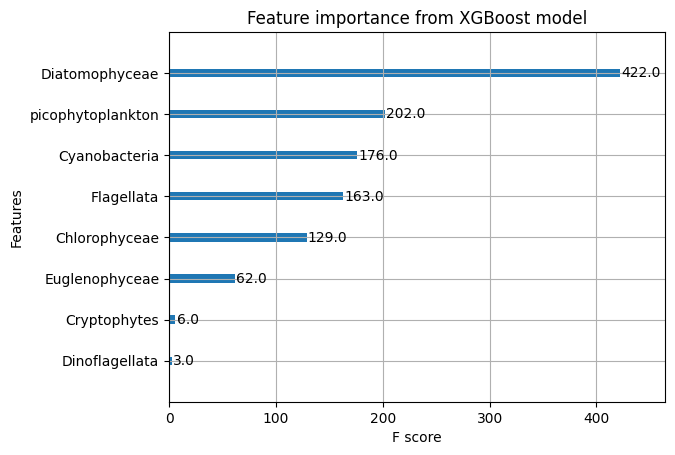

KOMBINACJA NUMER 3
n_estimators=1000, learning_rate=0.01, max_depth=5
Accuracy of XGB Classifier on test data: 55.319148936170215
Accuracy of XGB Classifier on train data: 100.0


<Figure size 640x480 with 0 Axes>

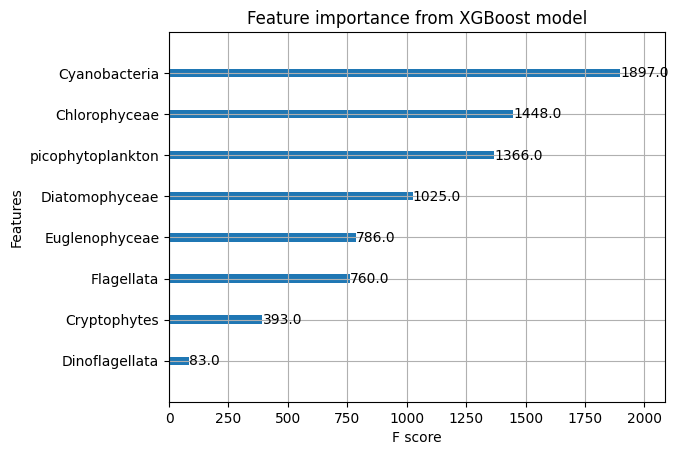

KOMBINACJA NUMER 4
n_estimators=1000, learning_rate=0.01, max_depth=20
Accuracy of XGB Classifier on test data: 59.57446808510638
Accuracy of XGB Classifier on train data: 100.0


<Figure size 640x480 with 0 Axes>

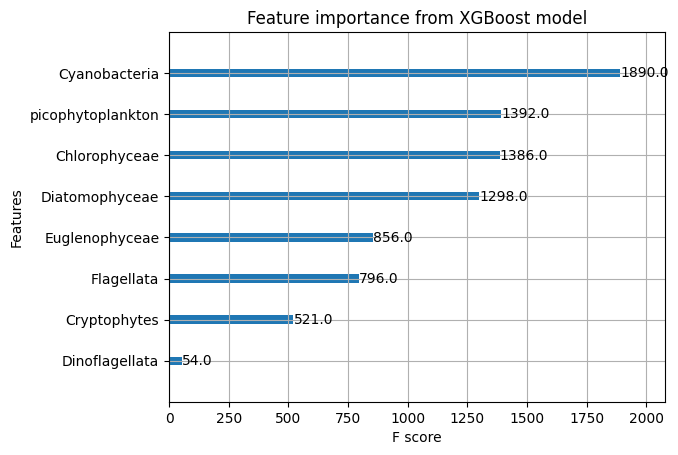

KOMBINACJA NUMER 5
n_estimators=10, learning_rate=0.8, max_depth=5
Accuracy of XGB Classifier on test data: 61.702127659574465
Accuracy of XGB Classifier on train data: 100.0


<Figure size 640x480 with 0 Axes>

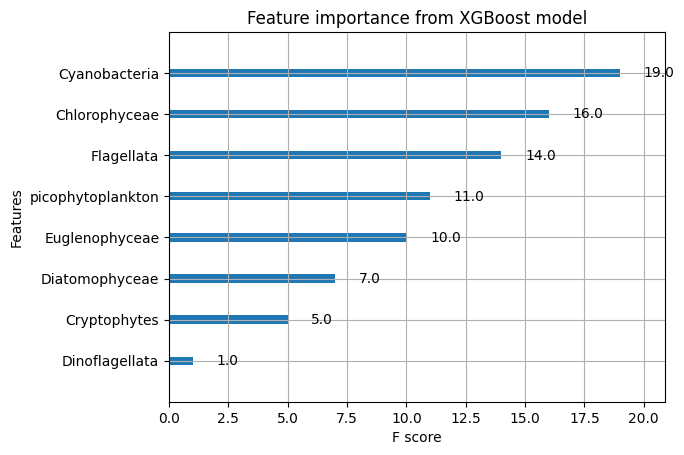

KOMBINACJA NUMER 6
n_estimators=10, learning_rate=0.8, max_depth=20
Accuracy of XGB Classifier on test data: 65.95744680851064
Accuracy of XGB Classifier on train data: 100.0


<Figure size 640x480 with 0 Axes>

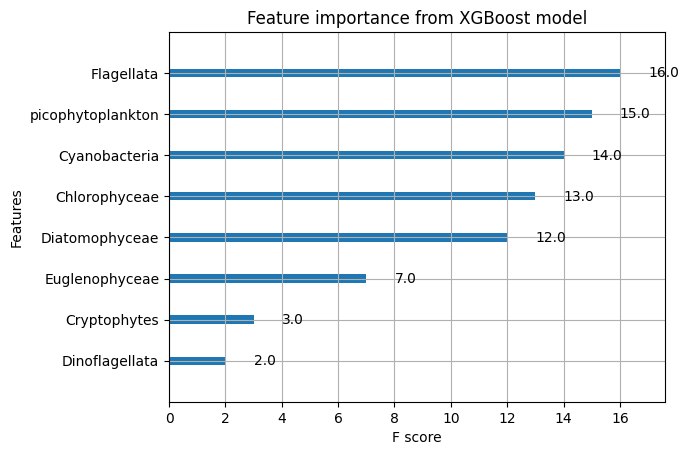

KOMBINACJA NUMER 7
n_estimators=10, learning_rate=0.01, max_depth=5
Accuracy of XGB Classifier on test data: 55.319148936170215
Accuracy of XGB Classifier on train data: 59.25925925925925


<Figure size 640x480 with 0 Axes>

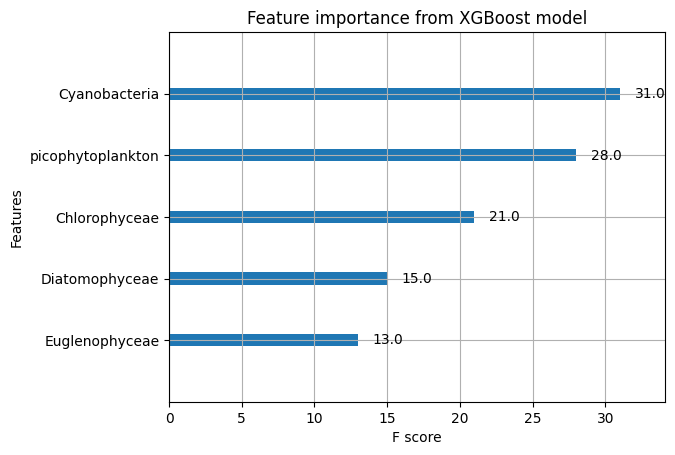

KOMBINACJA NUMER 8
n_estimators=10, learning_rate=0.01, max_depth=20
Accuracy of XGB Classifier on test data: 55.319148936170215
Accuracy of XGB Classifier on train data: 59.25925925925925


<Figure size 640x480 with 0 Axes>

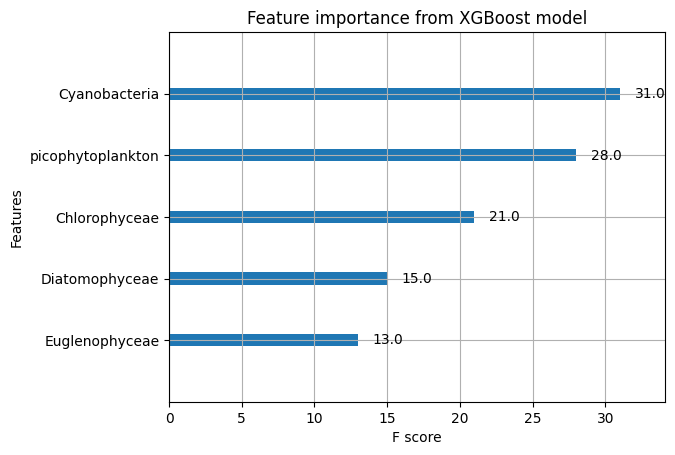

In [6]:
for est in n_estimators:
    for lr in learning_rate:
        for depth in max_depth:
            print('==================================================')
            print(f'KOMBINACJA NUMER {i}')
            print(f'n_estimators={est}, learning_rate={lr}, max_depth={depth}')
            print('==================================================')
            model = XGBClassifier(n_estimators=est, max_depth=depth, learning_rate=lr)
            model.fit(X_train, y_train)
            
            y_pred = model.predict(X_test)
            model_score = accuracy_score(y_test, y_pred)
            print(f'Accuracy of XGB Classifier on test data: {model_score * 100.0}')
            confusion_matrix(y_pred, y_test)
            
            y_pred = model.predict(X_train)
            model_score = accuracy_score(y_train, y_pred)
            print(f'Accuracy of XGB Classifier on train data: {model_score * 100.0}')
            confusion_matrix(y_pred, y_train)
            
            plt.figure()
            plot_importance(model, title='Feature importance from XGBoost model')
            plt.show()
            
            i = i + 1

# Najwyższe accuracy równe 65.9% osiąga model o następujących hiperparametrach: n_estimators=10, learning_rate=0.8, max_depth=20.